In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
import openpyxl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing the dataset
maxtemp=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\max_temperature.csv")

In [3]:
maxtemp

,Year,Month,past,pasttopast,max_temperature
0,1990,1,31.345000,30.500625,30.728750
1,1990,2,33.256250,34.333750,35.292500
2,1990,3,35.968750,37.507500,36.588125
3,1990,4,38.228125,36.901250,38.776250
4,1990,5,38.338750,37.835000,37.585000
...,...,...,...,...,...
355,2019,8,36.012500,34.577500,35.759375
356,2019,9,36.223125,33.137500,34.608750
357,2019,10,33.340000,32.659375,31.077500
358,2019,11,31.301875,30.332500,30.738750


In [4]:
maxtemp.shape

(360, 5)

In [5]:
maxtemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             360 non-null    int64  
 1   Month            360 non-null    int64  
 2   past             360 non-null    float64
 3   pasttopast       360 non-null    float64
 4   max_temperature  360 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 14.2 KB


In [6]:
#Creating correlation matrix for precipitation
corr_matrix=maxtemp.corr()
corr_matrix

,Year,Month,past,pasttopast,max_temperature
Year,1.000000e+00,2.844429e-15,-0.003971,-0.007216,0.007980
Month,2.844429e-15,1.000000e+00,-0.326135,-0.333408,-0.330214
past,-3.971073e-03,-3.261354e-01,1.000000,0.905558,0.903175
pasttopast,-7.215839e-03,-3.334079e-01,0.905558,1.000000,0.898180
max_temperature,7.980339e-03,-3.302137e-01,0.903175,0.898180,1.000000


In [7]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

c:\Users\C KIRANMAYI\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


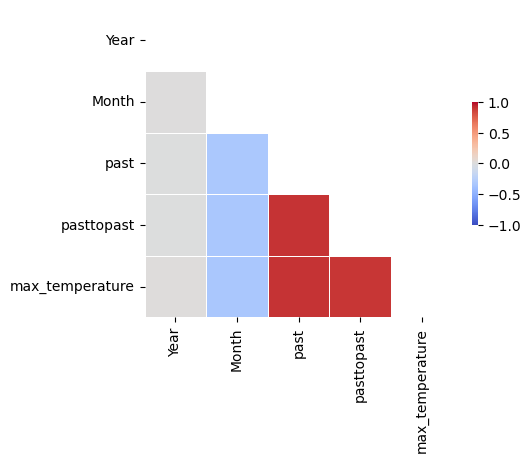

In [8]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
maxtemp=maxtemp.drop(['Year','Month'],axis=1)

In [10]:
maxtemp.shape

(360, 3)

In [11]:
X=maxtemp.drop('max_temperature',axis=1)
y=maxtemp.max_temperature

In [12]:
X

,past,pasttopast
0,31.345000,30.500625
1,33.256250,34.333750
2,35.968750,37.507500
3,38.228125,36.901250
4,38.338750,37.835000
...,...,...
355,36.012500,34.577500
356,36.223125,33.137500
357,33.340000,32.659375
358,31.301875,30.332500


In [13]:
y

0      30.728750
1      35.292500
2      36.588125
3      38.776250
4      37.585000
         ...    
355    35.759375
356    34.608750
357    31.077500
358    30.738750
359    28.890000
Name: max_temperature, Length: 360, dtype: float64

In [14]:
X.shape

(360, 2)

In [15]:
y.shape

(360,)

In [16]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping data for LSTM/GRU/RNN (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

### GRU

In [17]:
def create_gru_model(units=64):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [18]:
gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_47120\2098133132.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)


In [19]:
# Define the hyperparameter grid
gru_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [20]:
gru_grid = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, scoring='neg_mean_squared_error')

In [21]:
gru_grid_result = gru_grid.fit(X_train, y_train)

In [22]:
print(f"Best GRU params: {gru_grid_result.best_params_}")
print(f"Best GRU score: {gru_grid_result.best_score_}")

Best GRU params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best GRU score: -1.716656292797258


### LSTM

In [23]:
def create_lstm_model(units=64):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [24]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_47120\1916978622.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [25]:
# Define the hyperparameter grid
lstm_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [26]:
lstm_grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, scoring='neg_mean_squared_error')

In [27]:
lstm_grid_result = lstm_grid.fit(X_train, y_train)

In [28]:
print(f"Best LSTM params: {lstm_grid_result.best_params_}")
print(f"Best LSTM score: {lstm_grid_result.best_score_}")

Best LSTM params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best LSTM score: -1.6993319955743555


### RNN

In [29]:
def create_rnn_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [30]:
rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_47120\361697586.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)


In [31]:
rnn_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [32]:
rnn_grid = GridSearchCV(estimator=rnn_model, param_grid=rnn_param_grid, cv=3, scoring='neg_mean_squared_error')

In [33]:
rnn_grid_result = rnn_grid.fit(X_train, y_train)

In [34]:
print(f"Best SimpleRNN params: {rnn_grid_result.best_params_}")
print(f"Best SimpleRNN score: {rnn_grid_result.best_score_}")

Best SimpleRNN params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best SimpleRNN score: -2.1174300687270784


In [35]:
# Evaluating GRU model on test data
best_gru_model = gru_grid_result.best_estimator_
y_pred_gru = best_gru_model.predict(X_test)
mse_gru = mean_squared_error(y_test, y_pred_gru)


print(f"GRU Model - MSE: {mse_gru}")

# Evaluating LSTM model on test data
best_lstm_model = lstm_grid_result.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)


print(f"LSTM Model - MSE: {mse_lstm}")

# Evaluating SimpleRNN model on test data
best_rnn_model = rnn_grid_result.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f"SimpleRNN Model - MSE: {mse_rnn}")


GRU Model - MSE: 1.1538478529888856
LSTM Model - MSE: 1.2112326901983386
SimpleRNN Model - MSE: 1.3721265968648602


## GRU is sutaible for MaxTemperature with least MSE

In [45]:
maxtemp2021=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\max_temperature.csv")

In [46]:
maxtemp2021=maxtemp2021.drop(['Year','Month'],axis=1)

In [47]:
maxtemp2021

,past,pasttopast
0,30.831250,29.780625
1,34.380625,32.535625
2,37.186875,35.589375
3,37.785625,36.683125
4,38.653125,35.766250
5,37.623125,35.682500
6,36.013125,35.548750
7,35.759375,36.012500
8,34.608750,36.223125
9,31.077500,33.340000


In [48]:
maxtemp2020_pred=[]

In [49]:
maxtemp2021_scaled = scaler.transform(maxtemp2021)

# Reshape for prediction
maxtemp2021_scaled = np.reshape(maxtemp2021_scaled, (maxtemp2021_scaled.shape[0], maxtemp2021_scaled.shape[1], 1))

In [50]:
best_model = lstm_grid_result.best_estimator_

maxtemp2020_pred=best_model.predict(maxtemp2021_scaled)

In [51]:
maxtemp2020_pred

array([31.197437, 34.714855, 36.45599 , 36.752792, 37.076756, 36.654514,
       35.86793 , 35.74767 , 35.066532, 31.850979, 31.255104, 28.656942],
      dtype=float32)

In [52]:
#Predicting for 2020
maxtemp_data=pd.DataFrame(data=maxtemp2020_pred)
maxtemp_data

,0
0,31.197437
1,34.714855
2,36.455990
3,36.752792
4,37.076756
5,36.654514
6,35.867931
7,35.747669
8,35.066532
9,31.850979


In [53]:
#Exporting the predictions of 2020 into csv file
maxtemp_data.to_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\max_temperature1.csv")
